100%|██████████| 2600/2600 [00:10<00:00, 259.78it/s]
/afs/ihep.ac.cn/users/x/xuhangkun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


[0.44893674 0.11011992 0.05644532]


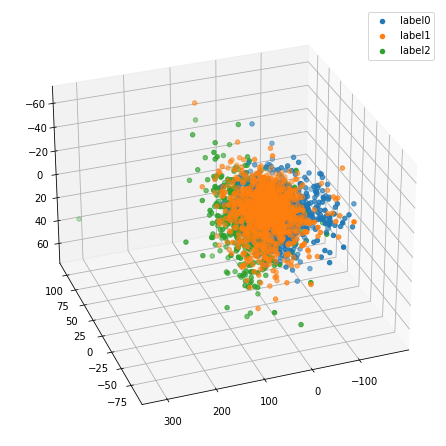

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from tqdm import tqdm
import os
from mpl_toolkits.mplot3d import Axes3D

def TrainPCA(X,chi2_cut=0.5,n_comp=3):
    """Train PCA
    """
    chi2_info = pd.read_csv("../data/chi2_info.csv")
    sel_dims = chi2_info[chi2_info["chi2"] > chi2_cut]["dim"].to_numpy()
    new_x = X[:,sel_dims]
    pca = PCA(n_components=n_comp)
    pca.fit(new_x)
    red_x = pca.transform(new_x)
    return pca, red_x

def main():
    train_open_data = pd.read_csv("../data/train_open.csv")
    features = []
    indexs = {
        "label0":[],
        "label1":[],
        "label2":[]
    }
    for i in tqdm(range(len(train_open_data))):
        file_name = os.path.join("../data/train","%s.npy"%(train_open_data["new_subject_id"][i]))
        x = np.load(file_name)
        x = np.nan_to_num(x,  nan=0, posinf=0, neginf=0)
        label = train_open_data["Label"][i]
        features.append(x)
        indexs["label%d"%(label)].append(i)
    features = np.array(features)
    features = np.nan_to_num(features, nan=1.e-10, posinf=1.e-10, neginf=1.e-10)
    mean = np.mean(features, axis=0)
    std = np.std(features, axis=0)
    features = (features - mean) / std
    features = np.nan_to_num(features,  nan=1.e-10, posinf=1.e-10, neginf=1.e-10)
    pca,red_x = TrainPCA(features)
    print(pca.explained_variance_ratio_)
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(red_x[indexs["label0"],0],red_x[indexs["label0"],1],red_x[indexs["label0"],2],label="label0")
    ax.scatter(red_x[indexs["label1"],0],red_x[indexs["label1"],1],red_x[indexs["label1"],2],label="label1")
    ax.scatter(red_x[indexs["label2"],0],red_x[indexs["label2"],1],red_x[indexs["label2"],2],label="label2")
    ax.legend()
    plt.show()
main()